## Opening/Closing Days
#### 2011/2012: 11/12/2011-4/22/2012
#### 2012/2013: 11/14/2012-4/21/2013
#### 2013/2014: 11/13/2013-4/27/2014
#### 2014/2015: 11/15/2014-4/26/2015

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib notebook
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Import Traffic

In [985]:
df_traf = pd.DataFrame.from_csv('../data_ski_in_solitude/berthoud_2014_15_traf.csv', parse_dates=True, index_col=27)

In [986]:
df_traf.tail()

,COUNTSTATIONID,COUNTDIR,COUNTDATE,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2015-04-24,223,S,20150424,16,9,2,8,32,103,53,...,252,277,316,358,376,311,207,126,94,41
2015-04-25,223,P,20150425,3,1,4,5,3,14,46,...,241,277,330,262,235,107,64,39,19,18
2015-04-25,223,S,20150425,24,8,3,7,22,70,62,...,245,242,194,183,130,89,90,61,47,25
2015-04-26,223,P,20150426,5,3,3,6,5,15,34,...,468,521,530,402,264,139,93,51,29,14
2015-04-26,223,S,20150426,18,3,7,8,22,51,52,...,104,89,81,99,55,60,36,17,19,12


In [987]:
df_traf.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [988]:
df_traf_prim, df_traf_sec = separate_traffic_directions(df_traf)

In [989]:
df_traf_prim, df_traf_sec = sum_morning_evening_and_drop_hourly(df_traf_prim, df_traf_sec)

functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_traf_prim.drop(['HOUR0', 'HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23'], inplace = True, axis = 1)
functions.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_traf_sec['morning_west'] = df_traf_sec.HOUR0 + df_traf_sec.HOUR1 + df_traf_sec.HOUR3 + df_traf_sec.HOUR4 + df_traf_sec.HOUR5 + df_traf_sec.HOUR6 + df_traf_

In [990]:
df_traf_prim.tail()

,COUNTDIR,morning_east,evening_east
FormattedDate,,,
2015-04-22,P,686,1272
2015-04-23,P,608,1139
2015-04-24,P,699,1524
2015-04-25,P,668,1938
2015-04-26,P,1107,3503


In [991]:
df_traf_prim['all_day_east'] = df_traf_prim.morning_east + df_traf_prim.evening_east
df_traf_sec['all_day_west'] = df_traf_sec.morning_west + df_traf_sec.evening_west

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [992]:
df_traf_all = df_traf_prim
df_traf_all['morning_west'] = df_traf_sec.morning_west 
df_traf_all['evening_west'] = df_traf_sec.evening_west
df_traf_all['all_day_west'] = df_traf_sec.all_day_west 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [993]:
df_traf_all = df_traf_all.drop('COUNTDIR', axis = 1)

In [994]:
df_traf_all.head()

,morning_east,evening_east,all_day_east,morning_west,evening_west,all_day_west
FormattedDate,,,,,,
2014-11-15,486,1209,1695,1037,927,1964
2014-11-16,897,2493,3390,763,726,1489
2014-11-17,683,1033,1716,711,782,1493
2014-11-18,535,1009,1544,730,801,1531
2014-11-19,550,1152,1702,816,898,1714


In [995]:
df_traf_plot = df_traf_all.drop(['morning_east','evening_east', 'morning_west', 'evening_west'], axis = 1)

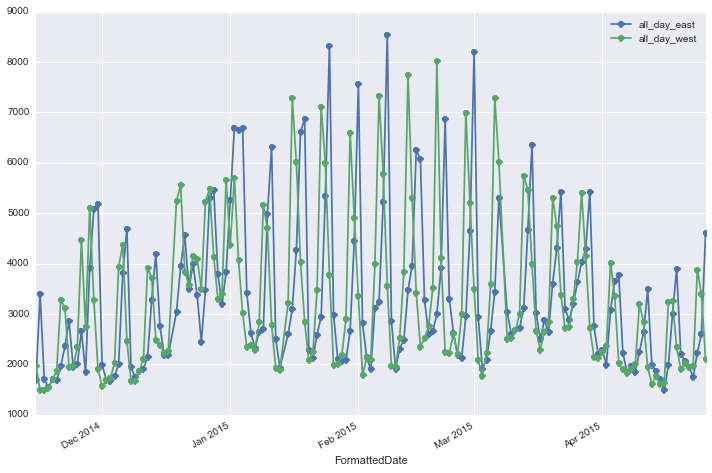

In [996]:
df_traf_plot.plot(marker = 'o')

In [997]:
df_traf_plot.tail()

,all_day_east,all_day_west
FormattedDate,,
2015-04-22,1958,1950
2015-04-23,1747,1977
2015-04-24,2223,3877
2015-04-25,2606,3399
2015-04-26,4610,2103


In [998]:
df_traf_plot = df_traf_plot.rename(columns={'all_day_east':'away_WP', 'all_day_west':'to_WP'})

In [999]:
df_berthoud = df_traf_plot

In [1000]:
df_berthoud.head()

,away_WP,to_WP
FormattedDate,,
2014-11-15,1695,1964
2014-11-16,3390,1489
2014-11-17,1716,1493
2014-11-18,1544,1531
2014-11-19,1702,1714


In [1001]:
day_of_week = []
for idx, day in df_berthoud.iterrows():
    day_of_week.append(idx.weekday())
    
df_berthoud['day_of_week'] = day_of_week

In [1002]:
df_berthoud['net_cars'] = df_berthoud.to_WP - df_berthoud.away_WP
df_berthoud['net_cars'] = df_berthoud['net_cars'].shift(1)
df_berthoud['net_cars'][0] = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [1003]:
skiers = []
count = 0
for idx, row in df_berthoud.iterrows():
    count += row.net_cars
    skiers.append(count)

In [1004]:
df_berthoud['skiers'] = skiers

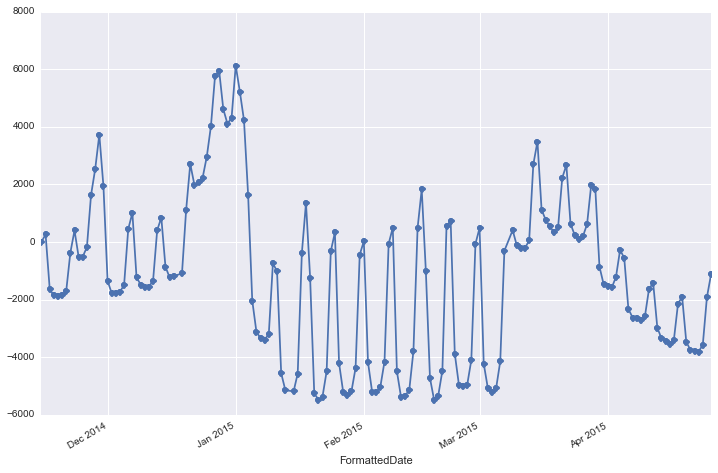

In [1005]:
df_berthoud['skiers'].plot(marker='o')

In [1006]:
df_berthoud.tail()

,away_WP,to_WP,day_of_week,net_cars,skiers
FormattedDate,,,,,
2015-04-22,1958,1950,2,-42,-3794
2015-04-23,1747,1977,3,-8,-3802
2015-04-24,2223,3877,4,230,-3572
2015-04-25,2606,3399,5,1654,-1918
2015-04-26,4610,2103,6,793,-1125


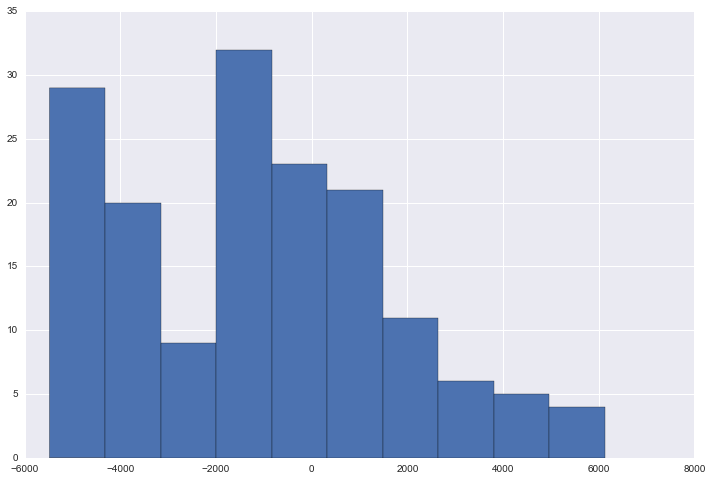

In [1007]:
df_berthoud.skiers.hist()

In [1008]:
df_berthoud.drop(['net_cars'], axis=1, inplace=True)

In [1009]:
df_berthoud.head()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2014-11-15,1695,1964,5,0
2014-11-16,3390,1489,6,269
2014-11-17,1716,1493,0,-1632
2014-11-18,1544,1531,1,-1855
2014-11-19,1702,1714,2,-1868


In [1010]:
df_berthoud.to_csv('../data_ski_in_solitude/berthoud_skiers_14_15.csv')

## Compare plots for the 4 years

<IPython.core.display.Javascript object>


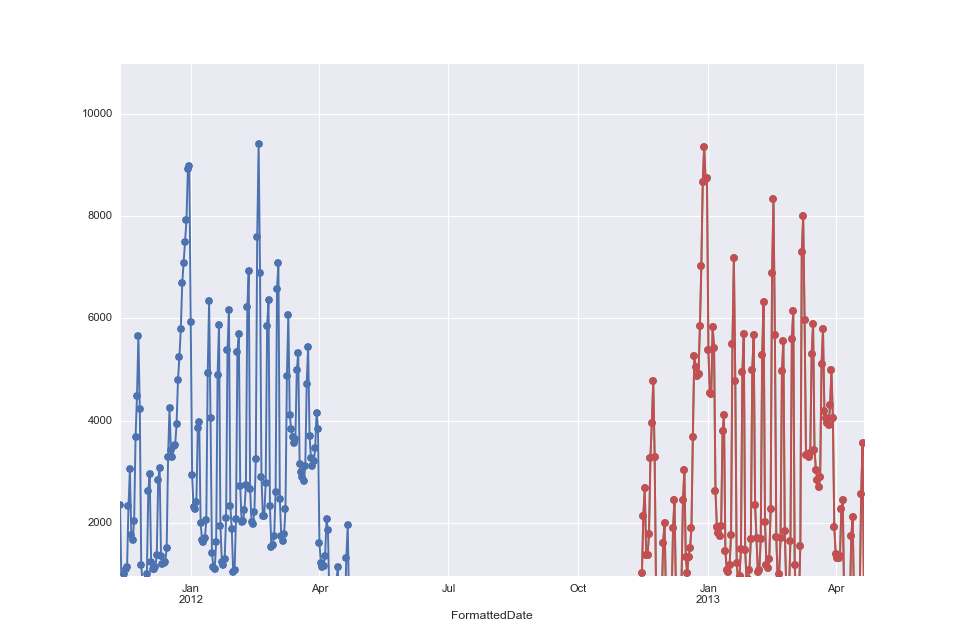

In [4]:
df_11_12 = pd.DataFrame.from_csv('../data_ski_in_solitude/traffic/berthoud_skiers_11_12.csv')
df_11_12['skiers'].plot(marker='o')

<IPython.core.display.Javascript object>


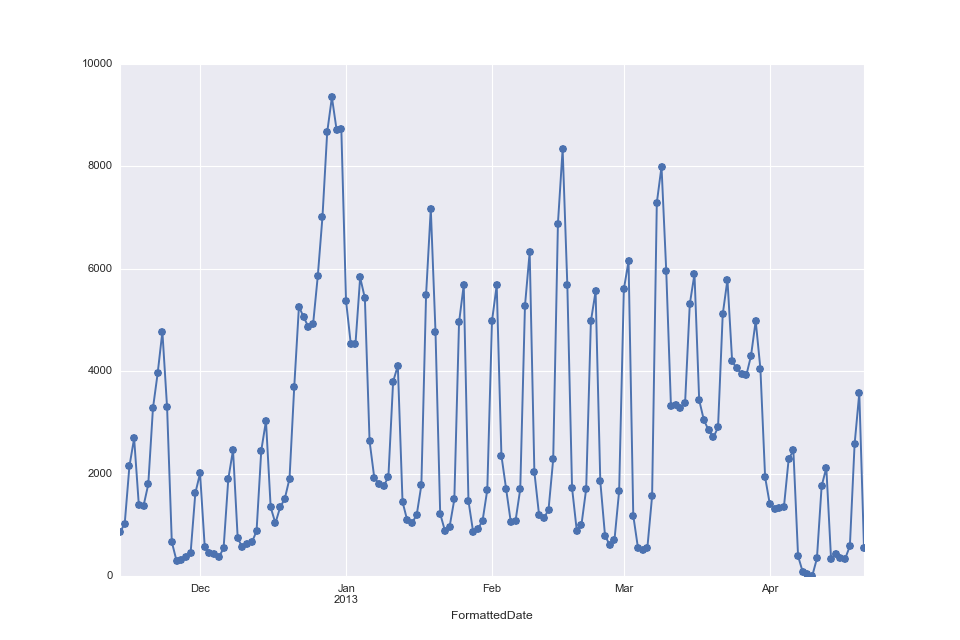

In [7]:
%matplotlib notebook
df_12_13 = pd.DataFrame.from_csv('../data_ski_in_solitude/traffic/berthoud_skiers_12_13.csv')
df_12_13['skiers'].plot(marker='o')

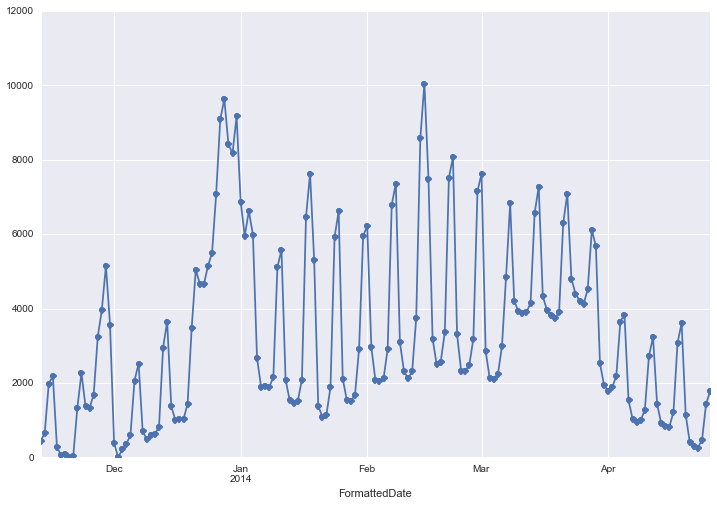

In [1025]:
df_13_14 = pd.DataFrame.from_csv('../data_ski_in_solitude/berthoud_skiers_13_14.csv')
df_13_14['skiers'].plot(marker='o')

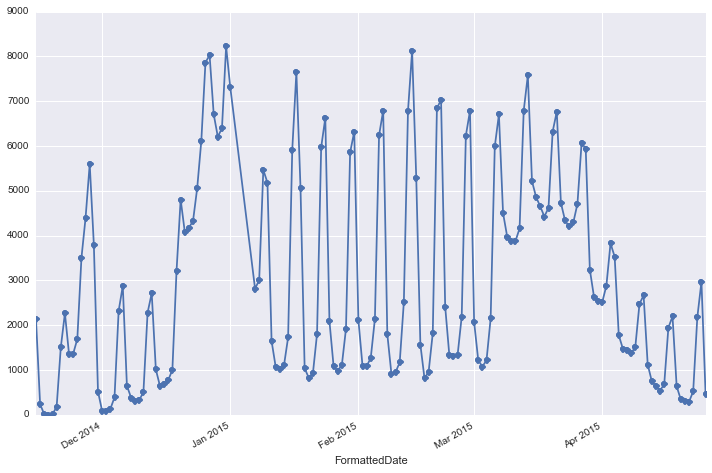

In [1030]:
df_14_15 = pd.DataFrame.from_csv('../data_ski_in_solitude/berthoud_skiers_14_15.csv')
df_14_15['skiers'].plot(marker='o')